# Ryan's Titanic Dataset Exploration
**Author:** Ryan Krabbe  
**Date:** 3/26/2025

**Objective:** Analyze, explore and manipulate the data from the Titanic Dataset


## Introduction
This project uses the Titantic dataset to explore different features that led to survival patterns such as age, sex, gender and fare. In this project, I'll manipulate and clean the data so it can be better used for machine learning.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [130]:

# This is a Python cell
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

from sklearn.svm import SVC

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows

In [131]:
# This is a Python cell. 
# Put your comments and code here. 
# Read the Markdown cell above for information and example code. 
#
# For example:

# Load the data
titanic = sns.load_dataset('titanic')


## Section 2. Data Exploration and Preparation
### 2.1 Handle Missing Values and Clean Data

In [132]:
# Impute missing values for age using the median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill in missing values for embark_town using the mode
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.2 Feature Engineering

In [133]:
# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

First:

input features: alone
target: survived

Second:

input features - age (or another variable of your choice)
target: survived

Third:

input features -  age and family_size (or another combination of your choice)
target: survived

### 3.2 Define X (features) and y (target)
- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time
- The follow starts with only the statements needed for case 1. 
- Double brackets [[ ]]]  makes a 2D DataFrame
- Single brackets [ ]  make a 1D Series

In [134]:
# Case 1: alone only 
X = titanic[['alone']]
y = titanic['survived']

# Case 2: age only
x2 = titanic[['age']]
y2 = titanic['survived']

# Case 3: age + family_size
x3 = titanic[['age', 'family_size']]
y3 = titanic['survived']

## Reflection 3

Why are these features selected? Age and family_size have a strong influence on the target feature: survival. For example, the age feature has a strong influence on survival because the younger people were more likely to be saved first rather than the elderly.

Are there any features that are likely to be highly predictive of survival? Yes, fare, pclass, and sex are also highly predictive of survival in their own way.

## Section 4. Train a Classification Model (Decision Tree)
### 4.1 Split the Data

In [135]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)
Create and train a decision tree model with no random initializer argument.

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance
Evaluate model performance on training data

In [137]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



Evaluate model performance on test data:

In [138]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Report Confusion Matrix (as a heatmap)
Plot a confusion matrix:

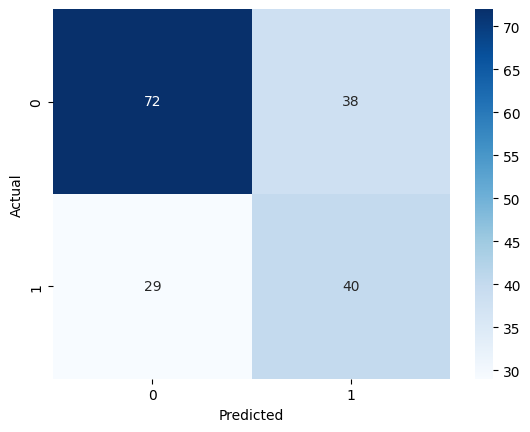

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

### 4.5 Report Decision Tree Plot
Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

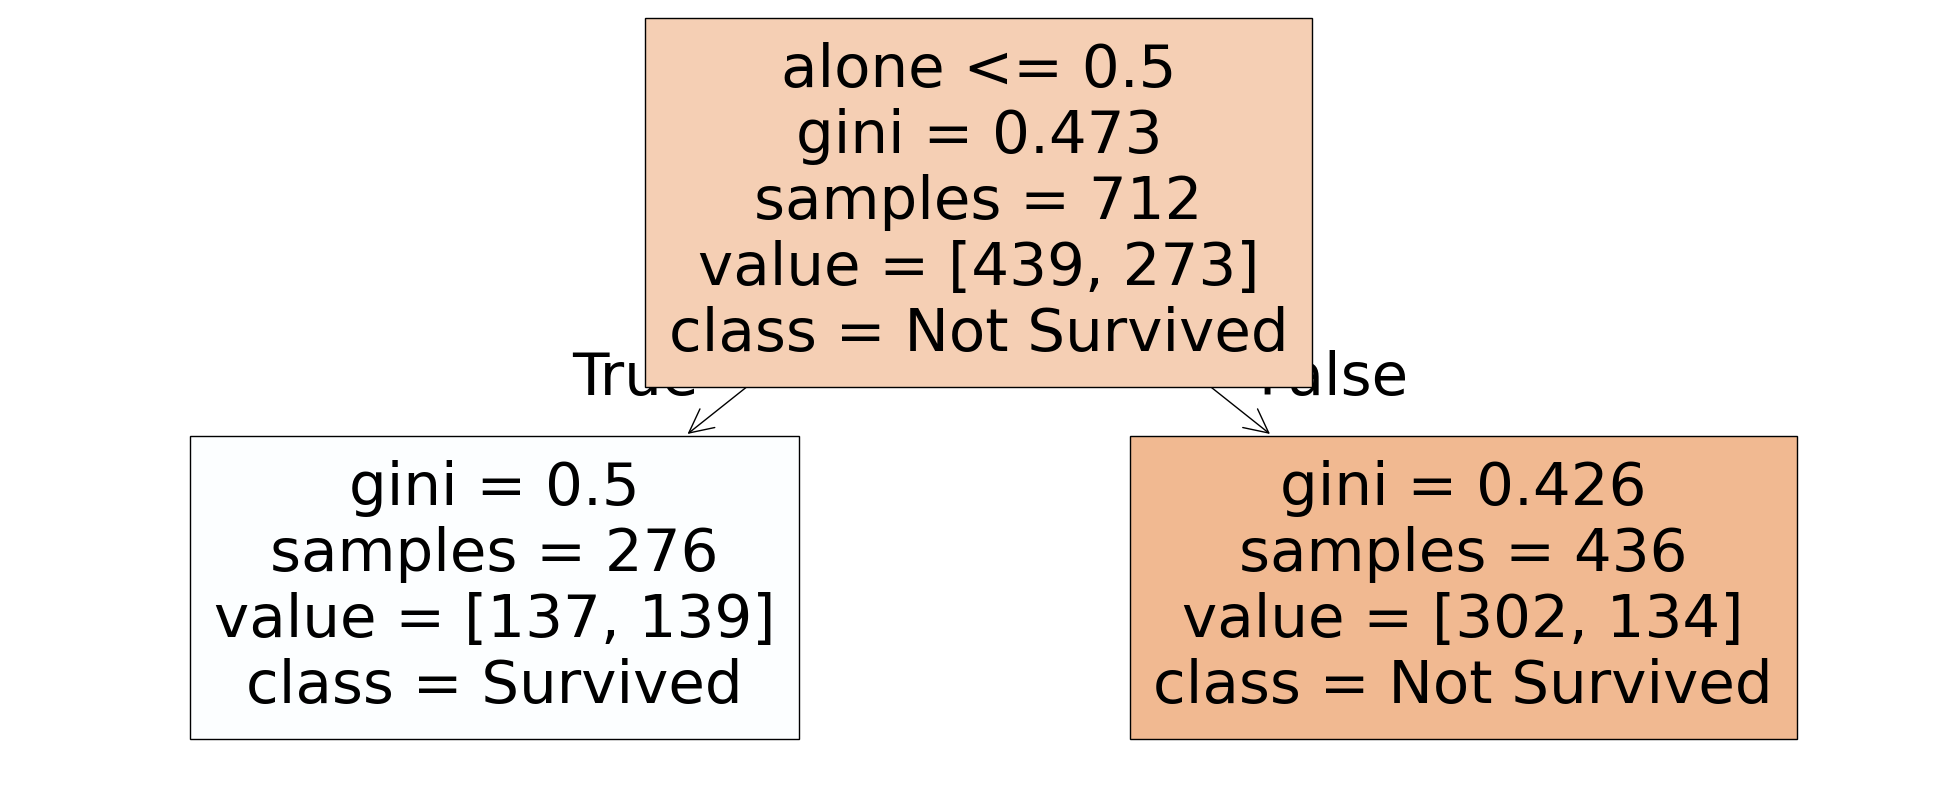

In [140]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### 4.6 Repeat for All 3 Cases
- In order to condense a bit, I am going to just paste the code without markdowns
- Second Case Below using x2 & y2

In [141]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    x2_train = x2.iloc[train_indices]
    x2_test = x2.iloc[test_indices]
    y2_train = y2.iloc[train_indices]
    y2_test = y2.iloc[test_indices]

print('Train size: ', len(x2_train), 'Test size: ', len(x2_test))

Train size:  712 Test size:  179


In [142]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x2_train, y2_train)

# Predict and evaluate training data (X train)
y2_pred = tree_model.predict(x2_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y2_train, y2_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712



In [143]:
y2_test_pred = tree_model.predict(x2_test)
print("Results for Decision Tree on test data:")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



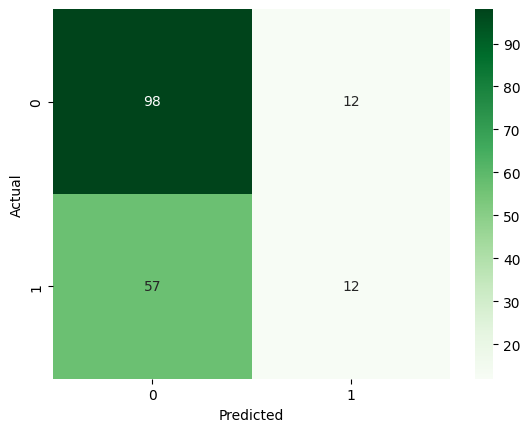

In [144]:
# Plot confusion matrix
cm = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

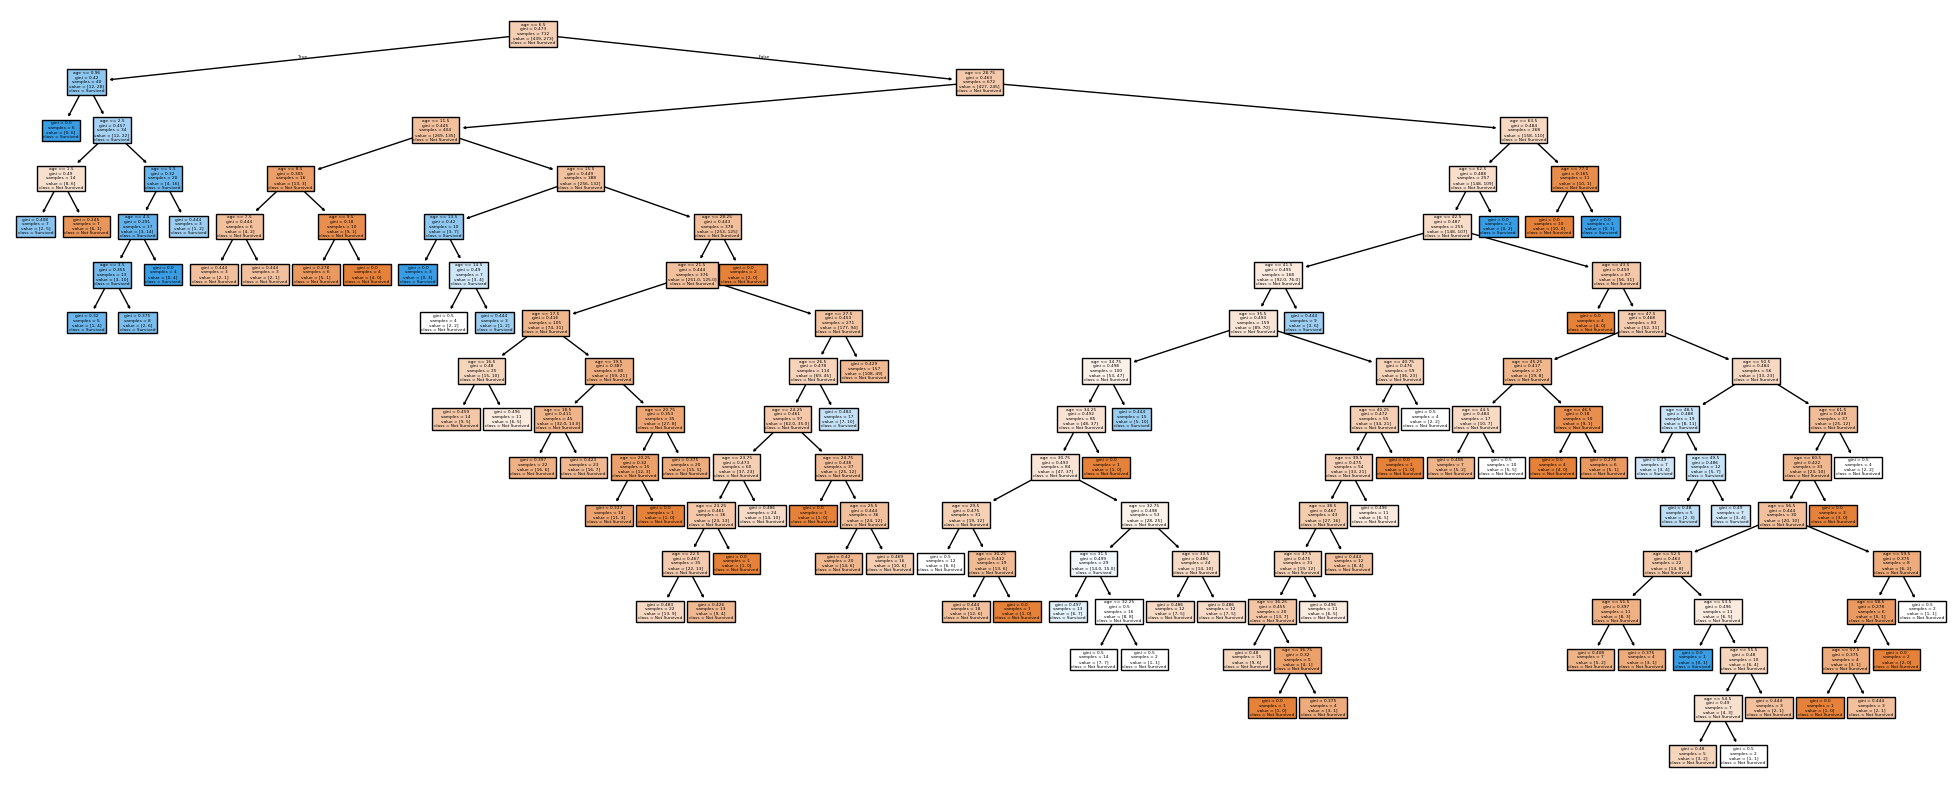

In [145]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=x2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_2.png")

### 4.7 Repeat for All 3 Cases
- In order to condense a bit, I am going to just paste the code without markdowns
- Third Case Below using x3 & y3

In [146]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    x3_train = x3.iloc[train_indices]
    x3_test = x3.iloc[test_indices]
    y3_train = y3.iloc[train_indices]
    y3_test = y3.iloc[test_indices]

print('Train size: ', len(x3_train), 'Test size: ', len(x3_test))

Train size:  712 Test size:  179


In [147]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x3_train, y3_train)

# Predict and evaluate training data (X train)
y3_pred = tree_model.predict(x3_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y3_train, y3_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [148]:
y3_test_pred = tree_model.predict(x3_test)
print("Results for Decision Tree on test data:")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



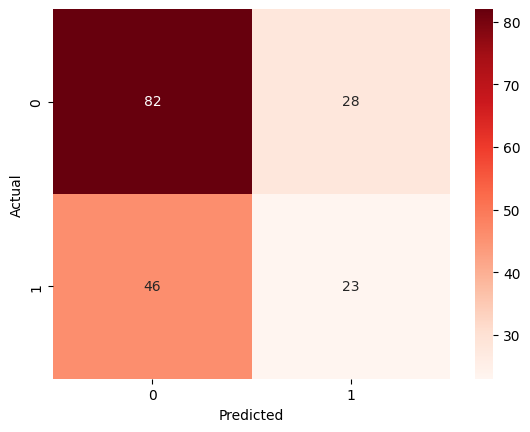

In [149]:
# Plot confusion matrix
cm = confusion_matrix(y3_test, y3_test_pred)
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

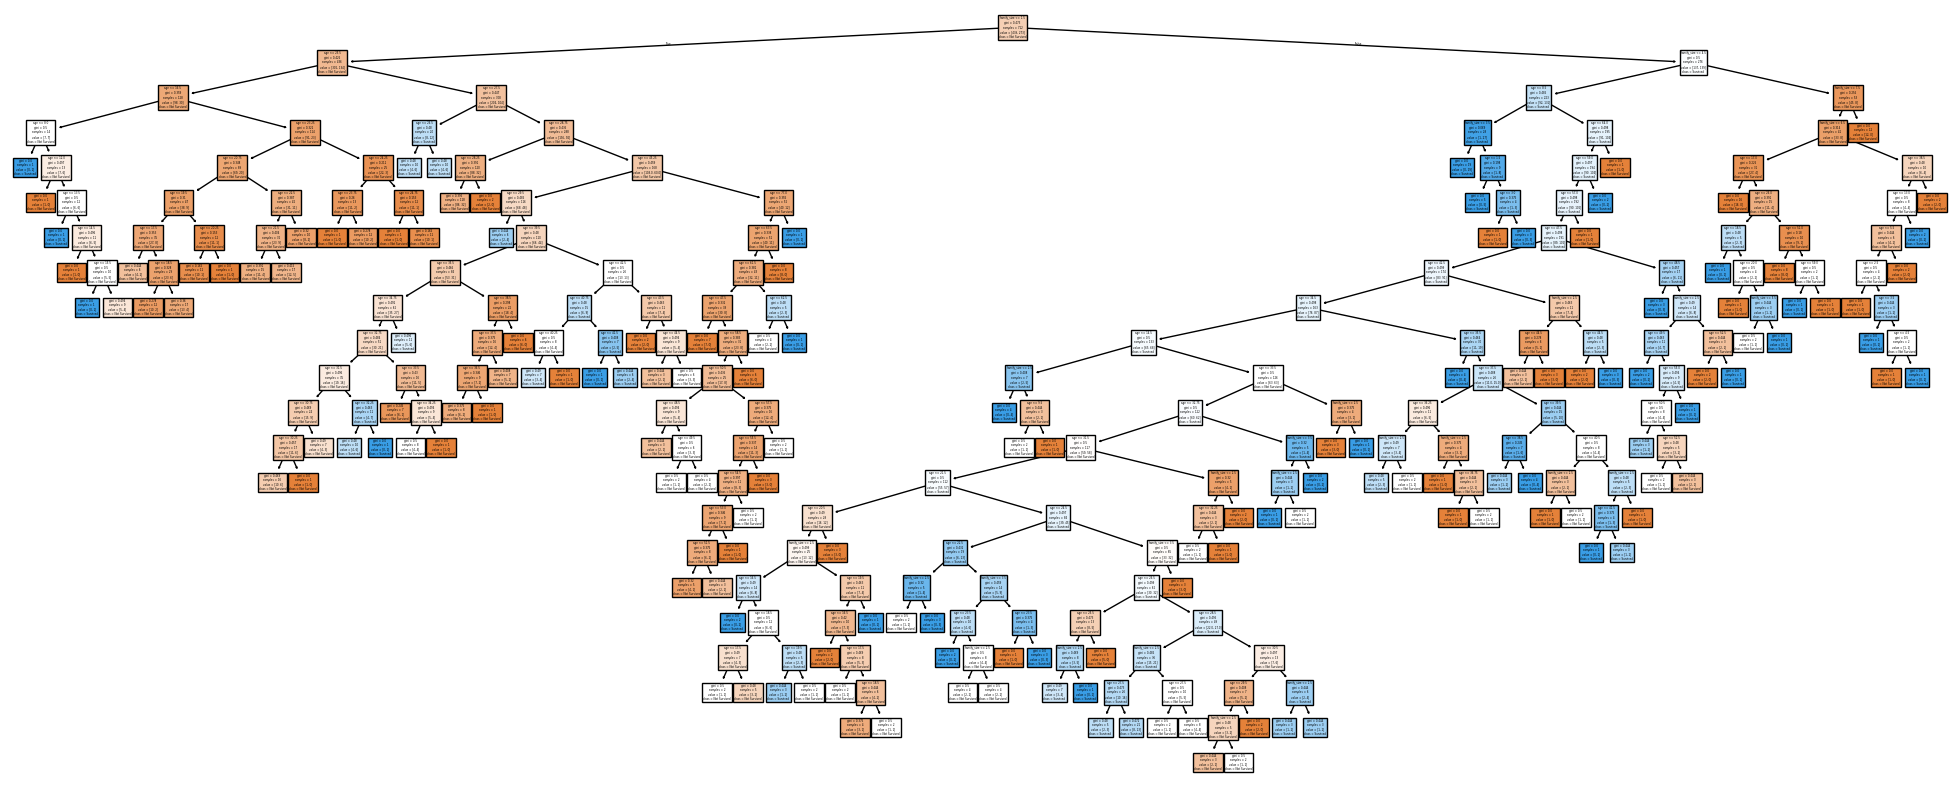

In [150]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=x3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_3.png")

### Reflection 4
- How well did the different cases perform?
    - Case 1 (alone) 63% accuracy
    - Case 2 (age) 61% accuracy
    - Case 3 (age + family_size) 59% accuracy

- Are there surprising results?
    - Yes, I would've expected case 3 to improve the accuracy of the model due to more features, but it's the lowest of the three cases.

- Which inputs worked better? 
    - The alone feature was the most accurate of the three features I chose.


## Section 5. Compare Alternative Models (SVC, NN)

In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

SVC Kernel: Common Types

- RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)
- Linear – Best for linearly separable data (straight line separation)
- Polynomial – Useful when the data follows a curved pattern
- Sigmoid – Similar to a neural network activation function; less common
- Commenting the options in and out in the code can be helpful. The analyst decides which to use based on their understanding of the results. 

In [152]:
# RBF Kernel (default) - same as calling SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
svc_model = SVC(kernel='poly', degree=3)
svc_model.fit(X_train, y_train)

# Sigmoid Kernel
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

SVC(kernel='sigmoid')

### 5.1 Train and Evaluate Model
Predict and evaluate the SVC model: 
- RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)

In [210]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame
df = titanic.copy()

# Encode 'sex' to numeric
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])

# Define features and target
X = df[['age', 'fare', 'sex_encoded', 'alone', 'pclass']]
y = df['survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVC model with RBF kernel and balanced class weights
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

# Predict on test set
y_pred = svc_rbf.predict(X_test)

# Evaluate
print("Results for SVC (RBF kernel, multiple features) on test data:")
print(classification_report(y_test, y_pred, zero_division=0))

Results for SVC (RBF kernel, multiple features) on test data:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



Predict and evaluate the SVC model: 
- Linear – Best for linearly separable data (straight line separation)

In [211]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame
df = titanic.copy()

# Encode 'sex' to numeric (0 = female, 1 = male)
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])

# Select features
X = df[['age', 'fare', 'sex_encoded', 'alone', 'pclass']]
y = df['survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVC model with Linear kernel and balanced class weights
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

# Predict on test set
y_pred = svc_linear.predict(X_test)

# Evaluate
print("Results for SVC (Linear kernel, multiple features) on test data:")
print(classification_report(y_test, y_pred, zero_division=0))

Results for SVC (Linear kernel, multiple features) on test data:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Predict and evaluate the SVC model: 
- Polynomial – Useful when the data follows a curved pattern

In [212]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame
df = titanic.copy()

# Encode 'sex' to numeric
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])

# Define features and target
X = df[['age', 'fare', 'sex_encoded', 'alone', 'pclass']]
y = df['survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVC model with Polynomial kernel
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)

# Predict on test set
y_pred = svc_poly.predict(X_test)

# Evaluate
print("Results for SVC (Polynomial kernel, multiple features) on test data:")
print(classification_report(y_test, y_pred, zero_division=0))

Results for SVC (Polynomial kernel, multiple features) on test data:
              precision    recall  f1-score   support

           0       0.61      0.97      0.75       105
           1       0.73      0.11      0.19        74

    accuracy                           0.61       179
   macro avg       0.67      0.54      0.47       179
weighted avg       0.66      0.61      0.52       179



Predict and evaluate the SVC model: 
- Sigmoid – Similar to a neural network activation function; less common

In [213]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame
df = titanic.copy()

# Encode 'sex' to numeric
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])

# Define features and target
X = df[['age', 'fare', 'sex_encoded', 'alone', 'pclass']]
y = df['survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVC model with Sigmoid kernel
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, y_train)

# Predict on test set
y_pred = svc_sigmoid.predict(X_test)

# Evaluate
print("Results for SVC (Sigmoid kernel, multiple features) on test data:")
print(classification_report(y_test, y_pred, zero_division=0))

Results for SVC (Sigmoid kernel, multiple features) on test data:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       105
           1       0.54      0.50      0.52        74

    accuracy                           0.62       179
   macro avg       0.61      0.60      0.60       179
weighted avg       0.62      0.62      0.62       179



Visualize Support Vectors
Create a scatter plot to visualize the support vectors. This helps understand how the SVM model separates the data.
Step-by-Step Process:

1) Split the data into two groups:

Survived – Passengers who survived the Titanic sinking (value = 1).
Not Survived – Passengers who did not survive (value = 0).

2) Create a scatter plot of these two groups using different colors and markers:

Yellow squares ('s') for survived passengers
Cyan triangles ('^') for non-survived passengers

3) Overlay the support vectors on top of the plot:

Black pluses ('+') will represent the support vectors.
Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

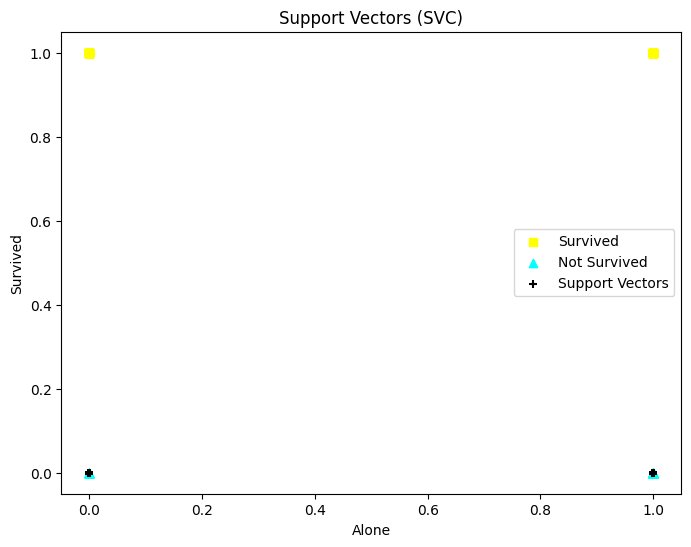

In [214]:
# Create data for charting - input target yes and input target no
survived_alone = X_test.loc[y_test == 1, 'alone']
not_survived_alone = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

### 5.2 Train and Evaluate Model (NN MLP)

In [215]:
# train a neural network model

from sklearn.neural_network import MLPClassifier


nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

c:\Projects\applied-ml-krabbe\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

Predict and evaluate Neural Network model:

In [216]:
y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



Plot confusion matrix:

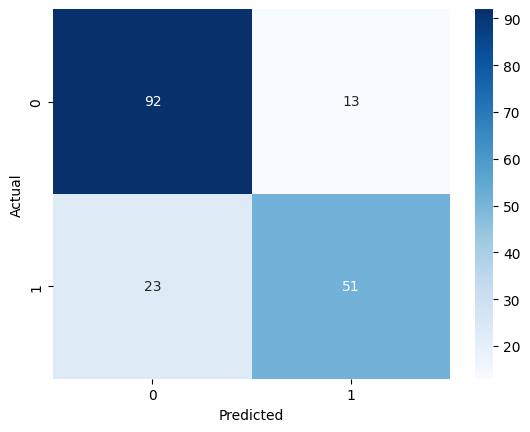

In [217]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5
- How well did each model perform?
    - RBF Kernel had 65% accuracy
    - Linear Kernel had 78% accuracy
    - Polynomial Kernel had 61% accuracy
    - Sigmoid Kernel had 62% accuracy
    - Neural Network had 80% accuracy

- Are there surprising results?
    - Yes, I'm a bit surprised that neural network had the best accuracy here considering it can handle complex patterns and this data didn't seem too complex. I'm not surprised that the Linear Kernel performed well.

- Why might one model outperform the others?
    - There are several factors that might affect why one model might outperform the others. For example, some models perform better with less data and some better with more data. If there are models that are meant to handle large amounts of complex data then they might not perform as well as a model who is fit to handle small amounts of straightforward data.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings
- What indicators are strong predictors of gender?
    - I would say sex is the strongest indicator of gender based on the features provided.
- How did the models perform?
    - Of the Kernels the Linear performed the best I believe due linear relationship between the different features. Poynomial and Sigmoid didn't perform as well and I think that was due to limited data being provided. I'm a little surprised that neural networks performed the best, but I think that was due to the model performing with less features than the others.

### 6.2 Discuss Challenges Faced
- At first, I wasn't getting good results with just the one feature being used so I added more features and the results started to become more clear with more data to work with.

### 6.3 Next Steps
- The next steps taken could be introducing more features to the data to see how it affects performance.

### Section 7. Summary Table

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 63% | 51% | 58% | 54% | - |
|                   | Case 2 | age | 61% | 50% | 17% | 26% | - |
|                   | Case 3 | age + family_size | 59% | 45% | 33% | 38% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (RBF Kernel)** | Case 1 | 'age', 'fare', 'sex_encoded', 'alone', 'pclass' | 65% | 75% | 24% | 37% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Linear Kernel)** | Case 1 | 'age', 'fare', 'sex_encoded', 'alone', 'pclass' | 78% | 75% | 70% | 73% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Poly Kernel)** | Case 1 | 'age', 'fare', 'sex_encoded', 'alone', 'pclass' | 61% | 73% | 11% | 19% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Sigmoid Kernel)** | Case 1 | 'age', 'fare', 'sex_encoded', 'alone', 'pclass' | 62% | 54% | 50% | 52% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Neural Network (MLP)** | Case 1 | alone | 80% | 80% | 69% | 74% | - |